# Analiza danych

### Wczytanie bibliotek

In [155]:
# Podstawowe biblioteki
import pandas as pd
import numpy as np
import re
import requests
import warnings
from collections import Counter

# Wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# Przetwarzanie teksty (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

# Przetwarzanie danych i uczenie maszynowe
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    mean_absolute_error, 
    mean_absolute_percentage_error, 
    silhouette_samples, 
    silhouette_score
)
# Statystyka
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

warnings.filterwarnings("ignore")


### Wczytanie danych

In [156]:
df = pd.read_csv('Cleaned_df_17g_stare_nowe_cleaned3.csv')

In [157]:
df = df.drop(df.columns[0], axis=1)

 ### I. Analiza ekspolaracyjna danych

#### 1. Wykres rozrzutu: Powierzchnia w m² vs Kwota

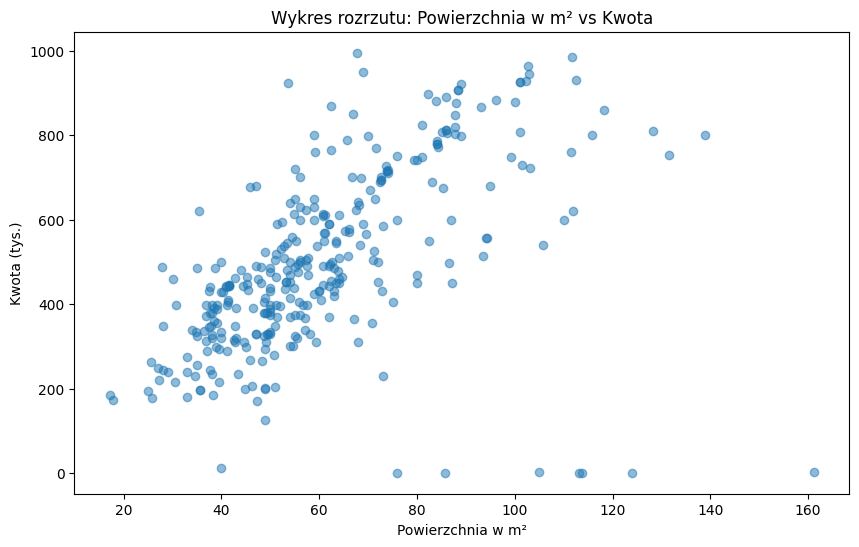

In [158]:
kwota_in_thousands = df['Kwota'] / 1000

plt.figure(figsize=(10, 6))

plt.scatter(df['Powierzchnia w m²'], kwota_in_thousands, alpha=0.5, cmap='viridis')
plt.title('Wykres rozrzutu: Powierzchnia w m² vs Kwota')
plt.xlabel('Powierzchnia w m²')
plt.ylabel('Kwota (tys.)')
plt.show()

In [159]:
df = df.loc[df['Kwota'] >= 13000]

#### 2. Wykres rozrzutu: Powierzchnia w m² vs Liczba pokoi

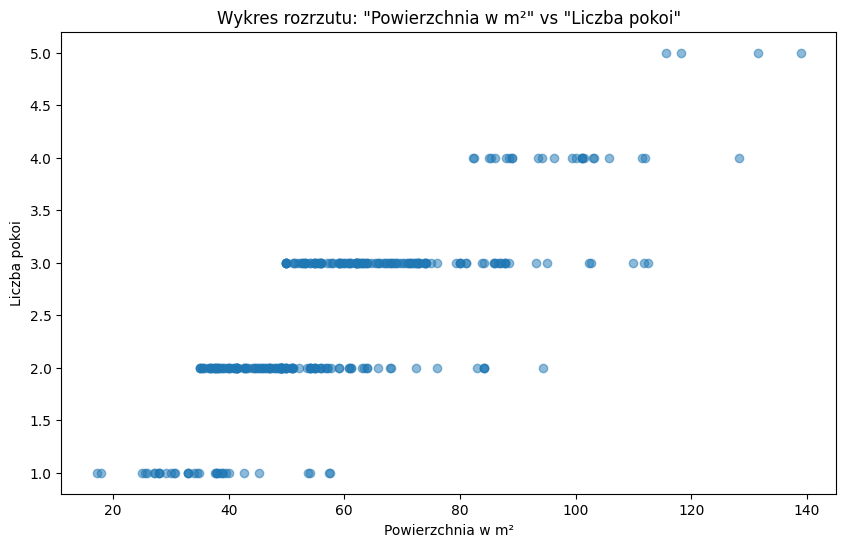

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Powierzchnia w m²'], df['Liczba pokoi'], alpha=0.5, cmap='viridis')
plt.title('Wykres rozrzutu: "Powierzchnia w m²" vs "Liczba pokoi"')
plt.xlabel('Powierzchnia w m²')
plt.ylabel('Liczba pokoi')
plt.show()

#### 3. Wykres rozrzutu: Liczba pokoi vs Kwota

Text(0, 0.5, 'Kwota (tys.)')

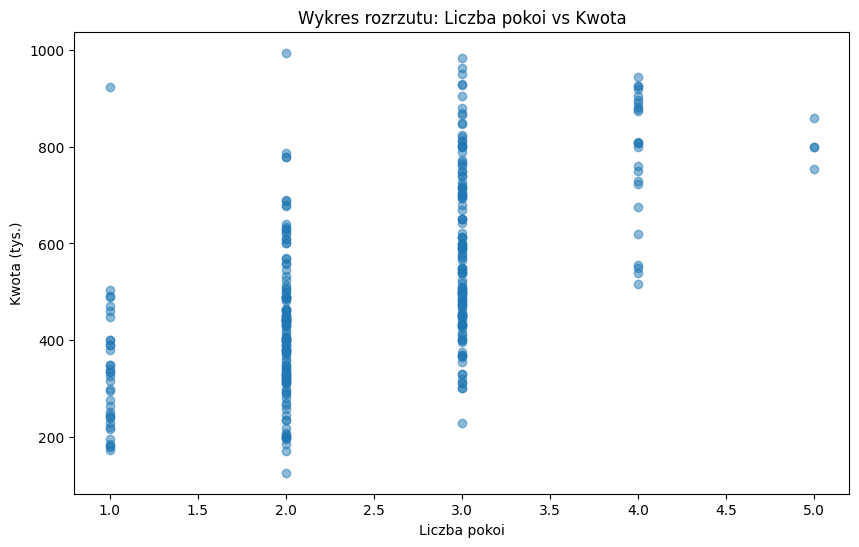

In [161]:
kwota_in_thousands = df['Kwota'] / 1000
plt.figure(figsize=(10, 6))
plt.scatter(df['Liczba pokoi'], kwota_in_thousands, alpha=0.5, cmap='viridis')
plt.title('Wykres rozrzutu: Liczba pokoi vs Kwota')
plt.xlabel('Liczba pokoi')
plt.ylabel('Kwota (tys.)')

In [162]:
kwota = df['Kwota'].sort_values(ascending=True).values
print(kwota)

[125000 170000 172900 179000 180900 185000 185000 195000 195800 196000
 199000 199000 201000 204000 207000 215000 217000 220000 229000 229000
 235000 235000 239000 240000 245000 245171 250000 257000 263000 265000
 269000 275000 279000 289000 290000 295000 295000 298000 299000 300000
 300000 310000 310000 310000 310000 310000 314000 315000 319900 319999
 320000 320000 324000 325000 325500 326000 328999 329000 329000 329000
 329000 330000 333000 333000 335000 337000 340000 340000 344900 349000
 349000 349000 349000 354999 355628 360000 365000 367000 369000 369000
 369000 372000 375000 375000 375000 378500 379000 379000 379900 380000
 381000 389000 389000 390000 390000 390000 395000 397758 398000 398000
 399000 399000 399000 399000 399000 399000 405000 405000 405000 405000
 409000 410000 415000 415000 420000 425000 429000 429000 430000 430000
 430000 430000 430000 432000 433185 435000 439000 439440 439518 439900
 442216 442622 443604 443800 444000 445000 446259 446259 448569 449000
 44900

#### 4. Obliczenie podstawowych statystykk 

In [163]:
statystyki=df[['Powierzchnia w m²', 'Cena za 1m²', 'Kwota','Liczba pokoi']].describe()
statystyki

,Powierzchnia w m²,Cena za 1m²,Kwota,Liczba pokoi
count,317.000000,317.000000,317.000000,317.000000
mean,59.747950,8661.702271,509199.570978,2.482650
std,21.014634,2285.048289,197143.569146,0.836574
min,17.140000,2551.020000,125000.000000,1.000000
25%,45.200000,7113.680000,369000.000000,2.000000
50%,55.760000,8775.080000,470000.000000,2.000000
75%,70.860000,9949.260000,633702.000000,3.000000
max,139.000000,17500.000000,995000.000000,5.000000


In [164]:
statystyki.to_csv('statystyki.csv')

#### 5. Sprawdzenie ilu pokojowych mieszkań jest najwięcej

In [165]:
room_counts = df['Liczba pokoi'].value_counts()
room_counts

Liczba pokoi
3    128
2    126
1     35
4     24
5      4
Name: count, dtype: int64

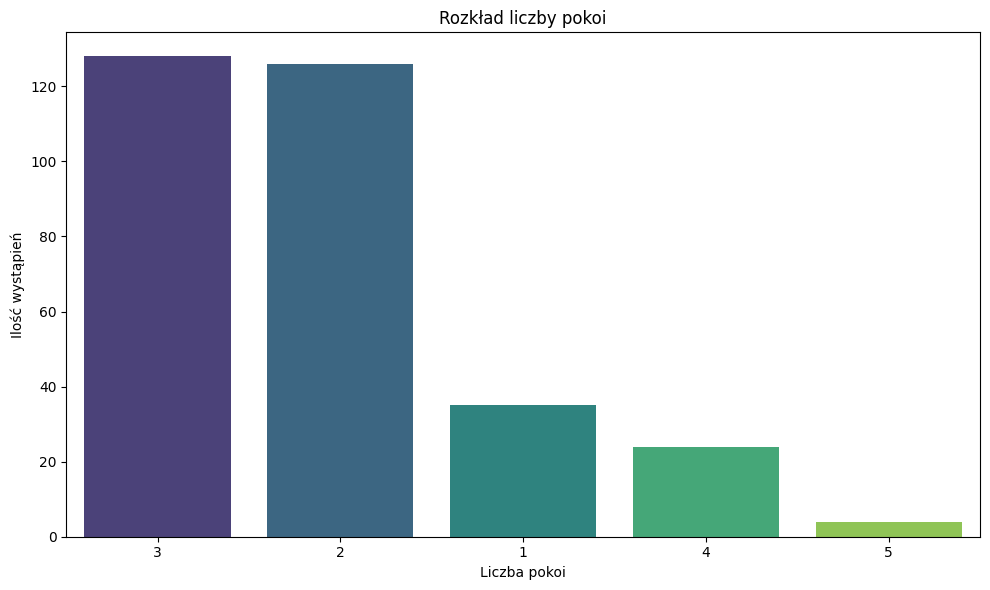

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Liczba pokoi', data=df, order=room_counts.index, palette='viridis')
plt.xlabel('Liczba pokoi')
plt.ylabel('Ilość wystąpień')
plt.title('Rozkład liczby pokoi')
plt.tight_layout()
plt.show()

#### 6. Rozkład pięter

In [167]:
poziom_counts = df['Poziom'].value_counts()
poziom_counts

Poziom
1           66
2           60
Parter      55
3           45
4           21
> 10        16
7           15
5           11
10           8
6            7
8            5
9            5
poddasze     3
Name: count, dtype: int64

In [168]:
procentowy_udzial = (poziom_counts / len(df)) * 100
procentowy_udzial

Poziom
1           20.820189
2           18.927445
Parter      17.350158
3           14.195584
4            6.624606
> 10         5.047319
7            4.731861
5            3.470032
10           2.523659
6            2.208202
8            1.577287
9            1.577287
poddasze     0.946372
Name: count, dtype: float64

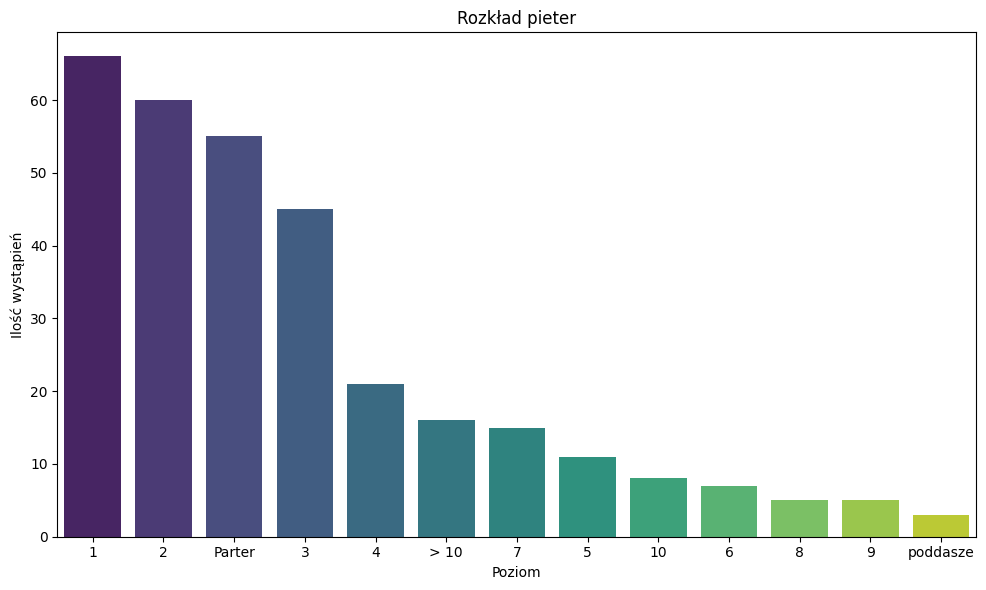

In [169]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Poziom', data=df, order=poziom_counts.index, palette='viridis')
plt.xlabel('Poziom')
plt.ylabel('Ilość wystąpień')
plt.title('Rozkład pieter')
plt.tight_layout()
plt.show()

#### 7. Sprawdzenie w jakiej dzielnicy wystawiane jest najwięcej ofert

In [170]:
location_counts = df['Dzielnica'].value_counts()
location_counts

Dzielnica
Koszutka                           61
Śródmieście                        45
Piotrowice-Ochojec                 38
Ligota-Panewniki                   32
Wełnowiec-Józefowiec               22
Osiedle Tysiąclecia                19
Kostuchna                          16
Janów-Nikiszowiec                  13
Bogucice                           11
Załęże                             10
Dąb                                 8
Murcki                              7
Giszowiec                           6
Brynów                              6
Osiedle Paderewskiego-Muchowiec     6
Dąbrówka Mała                       6
Zawodzie                            5
Osiedle Witosa                      3
Szopienice-Burowiec                 2
Podlesie                            1
Name: count, dtype: int64

In [171]:
location_counts = df['Dzielnica'].value_counts()
location_percentages = (location_counts / len(df['Dzielnica'])) * 100

print(location_percentages)


Dzielnica
Koszutka                           19.242902
Śródmieście                        14.195584
Piotrowice-Ochojec                 11.987382
Ligota-Panewniki                   10.094637
Wełnowiec-Józefowiec                6.940063
Osiedle Tysiąclecia                 5.993691
Kostuchna                           5.047319
Janów-Nikiszowiec                   4.100946
Bogucice                            3.470032
Załęże                              3.154574
Dąb                                 2.523659
Murcki                              2.208202
Giszowiec                           1.892744
Brynów                              1.892744
Osiedle Paderewskiego-Muchowiec     1.892744
Dąbrówka Mała                       1.892744
Zawodzie                            1.577287
Osiedle Witosa                      0.946372
Szopienice-Burowiec                 0.630915
Podlesie                            0.315457
Name: count, dtype: float64


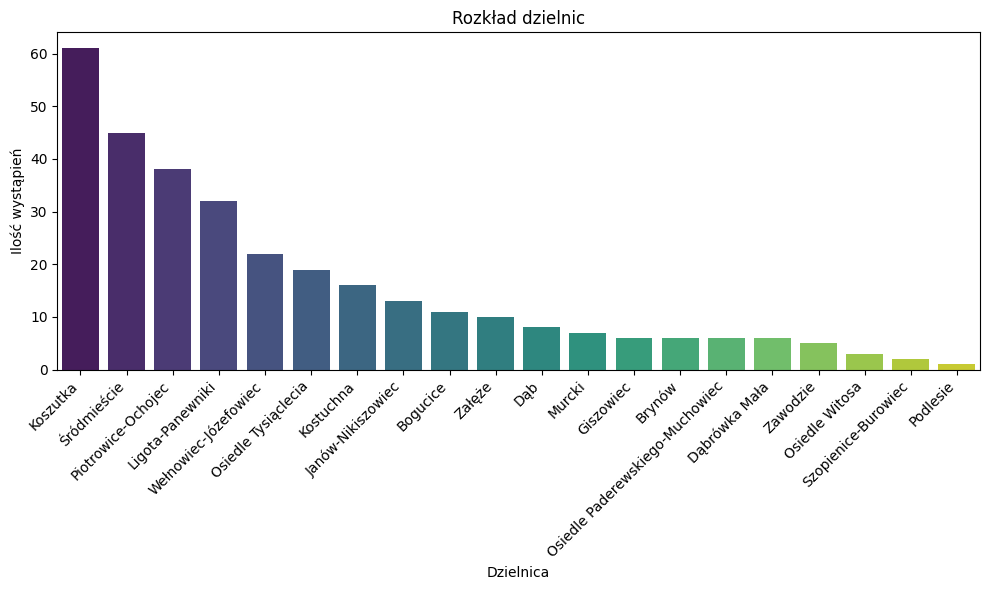

In [172]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Dzielnica', data=df, order=location_counts.index, palette='viridis')
plt.xlabel('Dzielnica')
plt.ylabel('Ilość wystąpień')
plt.title('Rozkład dzielnic')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### 8. Rozkład ceny za 1m² w poszczególnych dzielnicach

In [173]:
price_stats = df.groupby('Dzielnica')['Cena za 1m²'].describe()
price_stats

,count,mean,std,min,25%,50%,75%,max
Dzielnica,,,,,,,,
Bogucice,11.0,9158.668182,2715.279628,5897.68,7693.0050,8328.190,9751.2250,15333.33
Brynów,6.0,9877.025000,2596.424285,6943.75,8388.1600,9885.190,10114.3825,14468.09
Dąb,8.0,8805.412500,2018.109987,4446.93,8710.8900,9437.015,10200.0000,10273.44
Dąbrówka Mała,6.0,8102.083333,1354.815870,5612.50,7925.0000,8400.000,8800.0000,9500.00
Giszowiec,6.0,7033.985000,1405.347894,5770.95,6133.8000,6809.175,7129.2300,9670.02
Janów-Nikiszowiec,13.0,7365.745385,3065.872832,3136.99,5094.5200,6818.180,8904.8500,13955.73
Kostuchna,16.0,9053.115625,1832.660292,6291.67,7627.1900,8720.815,10731.0575,11818.18
Koszutka,61.0,9493.730328,1065.597630,6658.58,9168.9400,9567.440,10083.4200,12561.21
Ligota-Panewniki,32.0,8419.427813,2063.139400,5163.51,6829.9500,7928.550,10111.5475,13090.91


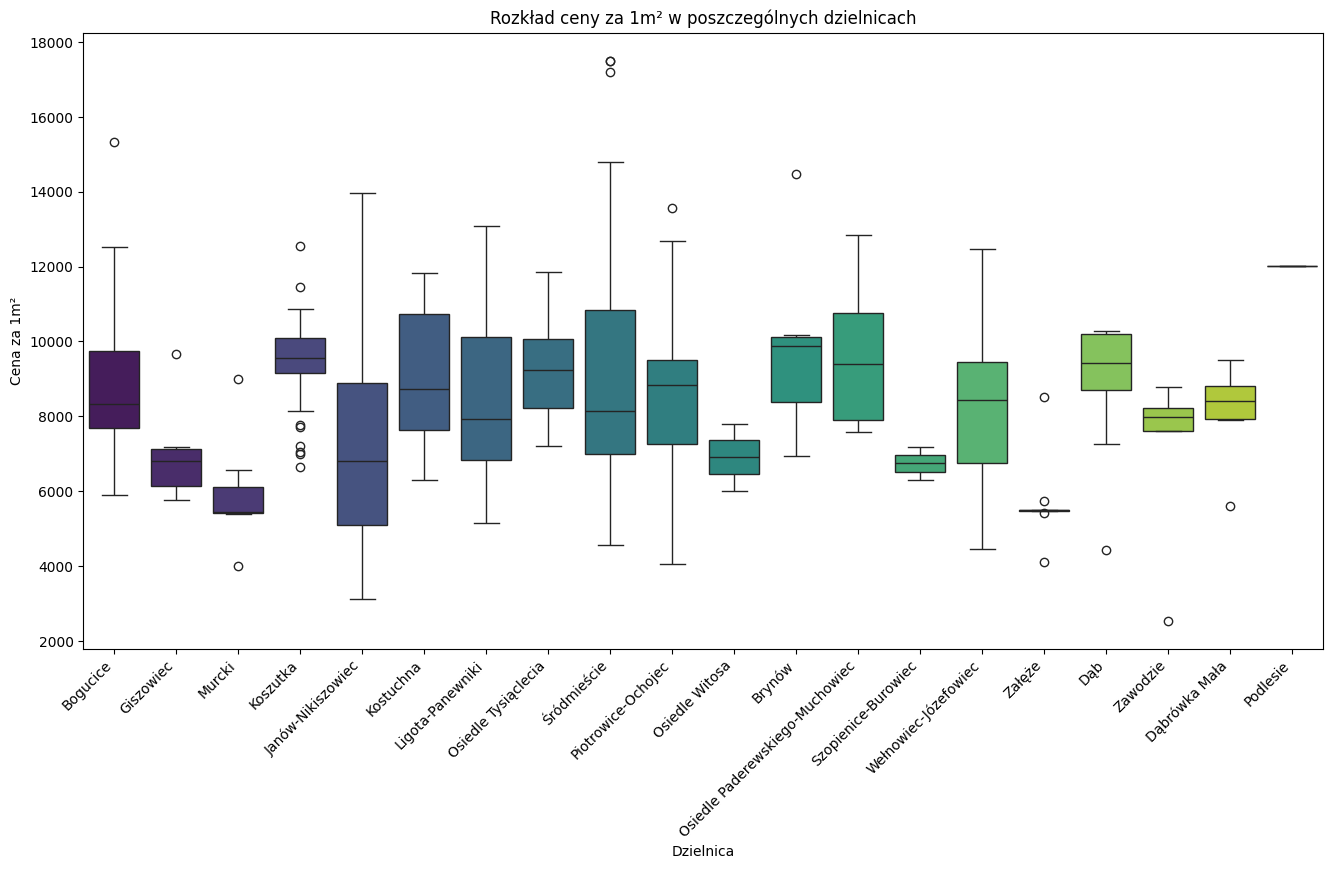

In [174]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Dzielnica', y='Cena za 1m²', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Obrót nazw dzielnic dla lepszej czytelności
plt.xlabel('Dzielnica')
plt.ylabel('Cena za 1m²')
plt.title('Rozkład ceny za 1m² w poszczególnych dzielnicach')
plt.show()

#### 9. Sprawdzenie jakie oferty mają najmniejszy popyt

In [175]:
df['Data dodania'] = pd.to_datetime(df['Data dodania'])

df['Dni do 13 grudnia'] = (pd.to_datetime('2023-12-13') - df['Data dodania']).dt.days

df_sorted = df.sort_values(by='Dni do 13 grudnia',ascending=False)

df_sorted[['Nazwa oferty', 'Dzielnica' ,'Powierzchnia w m²', 'Kwota', 'Cena za 1m²','Liczba pokoi','Poziom','Data dodania', 'Dni do 13 grudnia']].head(10)


,Nazwa oferty,Dzielnica,Powierzchnia w m²,Kwota,Cena za 1m²,Liczba pokoi,Poziom,Data dodania,Dni do 13 grudnia
161,Katowice ul. Przedwiośnie 13,Dąbrówka Mała,40.00,320000,8000.00,2,Parter,2023-10-22,52
287,BEZPOŚREDNIO apartament 2 pokoje Bytkowska 2.0,Wełnowiec-Józefowiec,42.86,461000,10755.95,2,1,2023-10-23,51
122,REZERWACJA os. Tysiąclecia- przytulne 2 pok,Osiedle Tysiąclecia,49.00,415000,8469.39,2,2,2023-10-29,45
29,Mieszkanie 55m Nikiszowec ogrodzone osiedle,Janów-Nikiszowiec,55.00,375000,6818.18,2,Parter,2023-11-01,42
169,Mieszkanie do własnej aranżacji przy archikate...,Śródmieście,68.30,539000,7891.65,3,2,2023-11-09,34
242,4 pokoje/2-poziomy/ostatnia kondygnacja/2 balkony,Piotrowice-Ochojec,103.21,722300,6998.35,4,9,2023-11-10,33
109,"Świetna lokalizacja, piękny widok, wysoki stan...",Śródmieście,39.96,499000,12487.49,2,> 10,2023-11-10,33
98,Duże mieszkanie z ogromnym tarasem i ogrodem,Kostuchna,112.51,930000,8265.93,3,Parter,2023-11-11,32
70,3Pok/Mieszkanie Nowy Nikisz,Janów-Nikiszowiec,53.20,452200,8500.00,3,Parter,2023-11-13,30
247,4 pokoje-pod wynajem-wysoki przychod-inwestycyjne,Załęże,67.22,365000,5429.93,3,5,2023-11-13,30


### 10. Macierz korelacji głównych czynników determinujących oferty nieruchcomości

In [176]:
df_1=pd.DataFrame(df)

df_1['Poziom'] = df['Poziom'].replace({'Powyżej 10': '10', 'Parter': '0'})
df_1['Poziom'] = pd.to_numeric(df['Poziom'], errors='coerce')
df_1['Liczba pokoi'] = pd.to_numeric(df['Liczba pokoi'], errors='coerce')

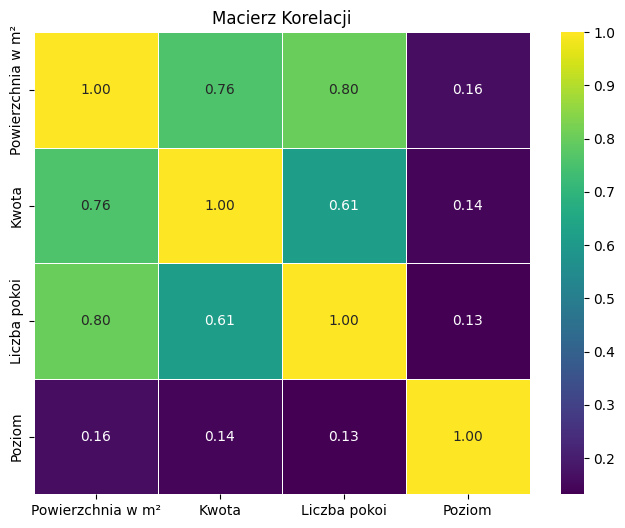

In [177]:
correlation_matrix = df_1[['Powierzchnia w m²', 'Kwota', 'Liczba pokoi','Poziom']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()

### 11. Procent mieszkań umeblowanych i nieumeblowanych

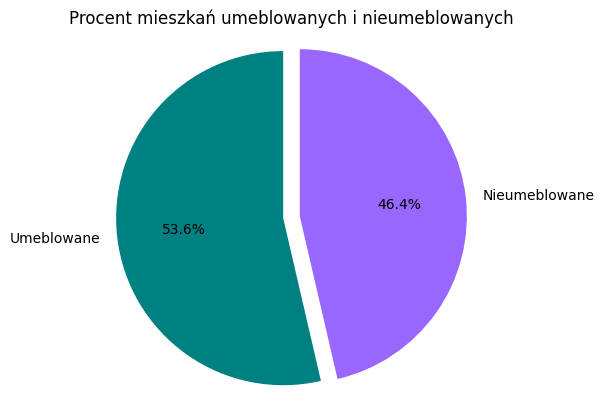

In [178]:

umeblowane_counts = df['Umeblowane'].value_counts(normalize=True)

procent_umeblowanych = umeblowane_counts.get('Tak', 0) * 100
procent_nieumeblowanych = 100 - procent_umeblowanych

labels = ['Umeblowane', 'Nieumeblowane']
sizes = [procent_umeblowanych, procent_nieumeblowanych]
colors = ['teal', '#9966ff']  
explode = (0.1, 0)  

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal') 
plt.title('Procent mieszkań umeblowanych i nieumeblowanych')
plt.show()


### 12. Chmura słów wizualizująca charakterystykę opisów ofert

In [179]:
data_list = df['Opis oczyszczony'].tolist()

In [180]:
combined_list = []

for item in data_list:
    item_list = eval(item) 
    combined_list.extend(item_list)

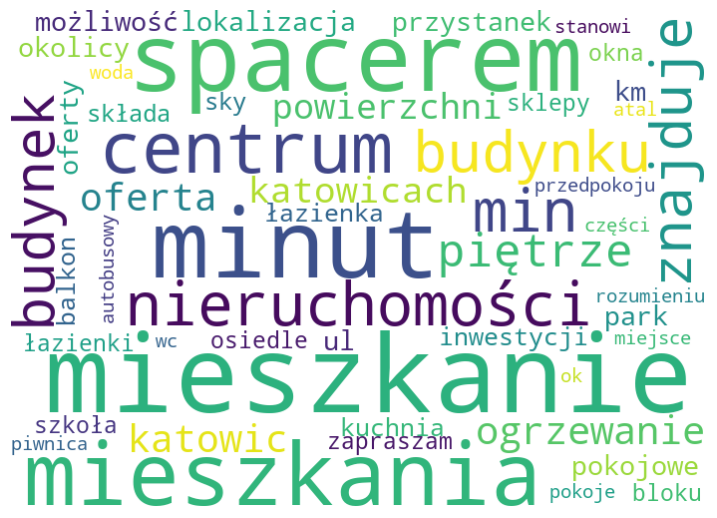

In [181]:
word_freq = pd.Series(combined_list).value_counts()
word_freq = word_freq.head(50)
wordcloud = WordCloud(width=700, height=500, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(9, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## II. Grupowanie dzielnic

In [182]:
df2 = pd.DataFrame(df)
df2['Umeblowane'] = df2['Umeblowane'].map({'Tak': 1, 'Nie': 0})
df2['Poziom'] = df2['Poziom'].replace({'> 10': 11, 'poddasze': 12, 'Parter':0}).astype(int)


In [183]:
df3 = df2[df2['Umeblowane'] == 1]
df3['Kwota (tys.)'] = df3['Kwota'] / 1000  
df3_1 = df3[['Kwota (tys.)', 'Liczba pokoi', 'Powierzchnia w m²']]

df4 = df2[df2['Umeblowane'] == 0]
df4['Kwota (tys.)'] = df4['Kwota'] / 1000 
df4_1 = df4[['Kwota (tys.)', 'Liczba pokoi', 'Powierzchnia w m²']]

### 1. Metoda KMeans

##### **Mieszkania umeblowane**

In [184]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3_1)

#### Metoda łokcia do znalezienia optymalnej liczby klastrów

In [185]:
n_clusters_list = list(range(1, 11))
inertia_list = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)

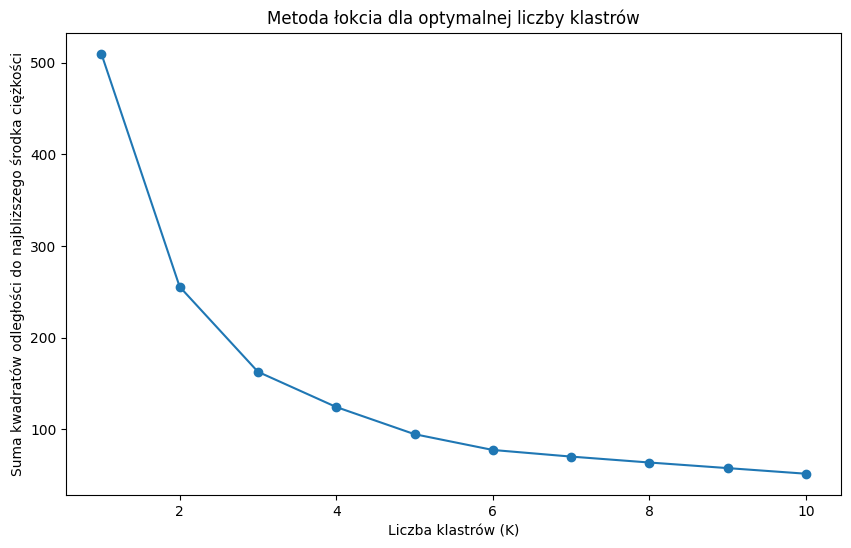

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_list, inertia_list, marker='o')
plt.title('Metoda łokcia dla optymalnej liczby klastrów')
plt.xlabel('Liczba klastrów (K)')
plt.ylabel('Suma kwadratów odległości do najbliższego środka ciężkości')
plt.show()

#### Porównanie silhouette score do znalezienia optymalnej liczby klastrów

In [187]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters)
  df3['Cluster_k'] = kmeans.fit_predict(df_scaled)
  
  silhouette_avg=silhouette_score(df_scaled,  df3['Cluster_k'] )
  print('For n_clusters =', n_clusters,'the average silhouette_score is:', silhouette_avg)
  sample_silhouette_values = silhouette_samples(df_scaled, df3['Cluster_k'] )

For n_clusters = 2 the average silhouette_score is: 0.43227850899231063
For n_clusters = 3 the average silhouette_score is: 0.44232113618814106
For n_clusters = 4 the average silhouette_score is: 0.4142155048657532
For n_clusters = 5 the average silhouette_score is: 0.4405598571161149
For n_clusters = 6 the average silhouette_score is: 0.46654388077293757
For n_clusters = 7 the average silhouette_score is: 0.46062363912579907
For n_clusters = 8 the average silhouette_score is: 0.4201993393528744
For n_clusters = 9 the average silhouette_score is: 0.34763049012292707


In [188]:
kmeans = agglomerative = KMeans(n_clusters=3)
df3['Cluster_k'] = kmeans.fit_predict(df_scaled)

In [189]:
min_max_values = df3.groupby('Cluster_k').agg({
    'Kwota (tys.)': ['mean'],
    'Powierzchnia w m²': ['mean'],
    'Liczba pokoi': ['min', 'max']
}).reset_index()
min_max_values['Liczba ofert w grupie'] = df3.groupby('Cluster_k').size().values
min_max_values

Cluster_k Kwota (tys.) Powierzchnia w m² Liczba pokoi      \
                    mean              mean          min max   
0         0   573.998012         62.303133            1   3   
1         1   782.816250        103.854375            3   5   
2         2   351.226282         41.134366            1   2   

  Liczba ofert w grupie  
                         
0                    83  
1                    16  
2                    71

#### Wizualizacja grupowania mieszkań umeblowanych metodą k-średnich

In [190]:
fig = px.scatter_3d(df3,
                   x='Powierzchnia w m²',
                   y='Kwota (tys.)',
                   z='Liczba pokoi',
                   color='Cluster_k',  
                   size_max=2,
                   opacity=0.7,
                   color_continuous_scale='viridis',
                                      color_continuous_midpoint=1,  
                   labels={'Powierzchnia w m²': 'Powierzchnia w m²', 'Kwota (tys.)': 'Kwota (tys.)', 'Cluster_k': 'Cluster_k'},
                   title='Grupowanie k-średnich - mieszkania umeblowane'
                   )
fig.update_layout(scene=dict(
                    xaxis_title='Powierzchnia w m²',
                    yaxis_title='Kwota (tys.)',
                    zaxis_title='Liczba pokoi',
                    ),
                  width=700,  
                  height=500,
                margin=dict(l=2, r=2, b=0.5, t=80)  
)

fig.show()

In [191]:
fig.write_html("scatter_plot_umeblowane_k.html")

##### **Mieszkania nieumeblowane**

In [192]:
scaler = StandardScaler()
df_scaled_n = scaler.fit_transform(df4_1)

#### Metoda łokcia do znalezienia optymalnej liczby klastrów

In [193]:
n_clusters_list = list(range(1, 11))
inertia_list = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_scaled_n)
    inertia_list.append(kmeans.inertia_)

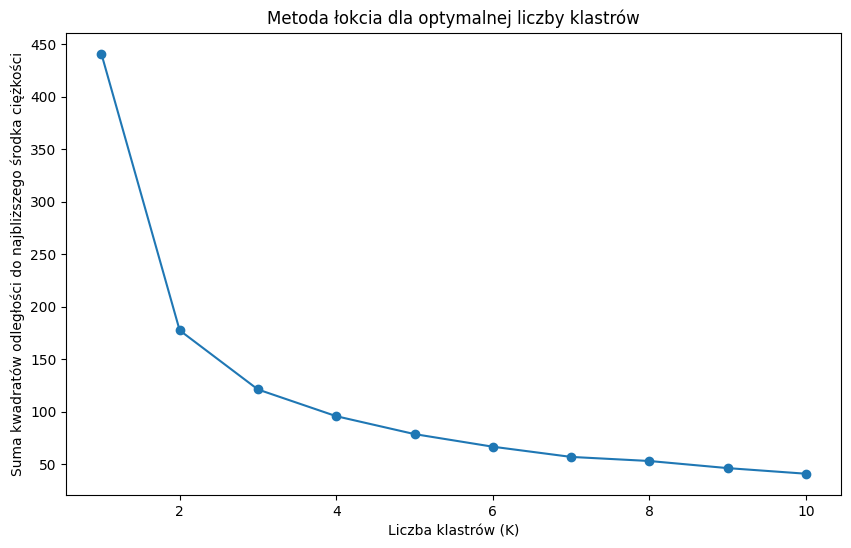

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_list, inertia_list, marker='o')
plt.title('Metoda łokcia dla optymalnej liczby klastrów')
plt.xlabel('Liczba klastrów (K)')
plt.ylabel('Suma kwadratów odległości do najbliższego środka ciężkości')
plt.show()

#### Porównanie silhouette score do znalezienia optymalnej liczby klastrów

In [195]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters)
  df4['Cluster_k'] = kmeans.fit_predict(df_scaled_n)
  
  silhouette_avg=silhouette_score(df_scaled_n,  df4['Cluster_k'] )
  print('For n_clusters =', n_clusters,'the average silhouette_score is:', silhouette_avg)
  sample_silhouette_values = silhouette_samples(df_scaled_n, df4['Cluster_k'] )

For n_clusters = 2 the average silhouette_score is: 0.5053957054771626
For n_clusters = 3 the average silhouette_score is: 0.41299220771726863
For n_clusters = 4 the average silhouette_score is: 0.4188139188969158
For n_clusters = 5 the average silhouette_score is: 0.3666197124265291
For n_clusters = 6 the average silhouette_score is: 0.38835386608711125
For n_clusters = 7 the average silhouette_score is: 0.38562736983433293
For n_clusters = 8 the average silhouette_score is: 0.39806147223400734
For n_clusters = 9 the average silhouette_score is: 0.40327986012676215


In [196]:
kmeans = KMeans(n_clusters=2)
df4['Cluster_k'] = kmeans.fit_predict(df_scaled_n)

In [197]:
min_max_values = df4.groupby('Cluster_k').agg({
    'Kwota (tys.)': ['mean'],
    'Powierzchnia w m²': ['mean'],
    'Liczba pokoi': ['min', 'max']
}).reset_index()
min_max_values['Liczba ofert w grupie'] = df4.groupby('Cluster_k').size().values
min_max_values

Cluster_k Kwota (tys.) Powierzchnia w m² Liczba pokoi      \
                    mean              mean          min max   
0         0   746.128185         85.461296            2   5   
1         1   387.326677         49.159355            1   3   

  Liczba ofert w grupie  
                         
0                    54  
1                    93

#### Wizualizacja grupowania mieszkań nieumeblowanych metodą grupowania k-średniach

In [198]:
fig = px.scatter_3d(df4,
                   x='Powierzchnia w m²',
                   y='Kwota (tys.)',
                   z='Liczba pokoi',
                   color='Cluster_k',  
                   size_max=2,
                   opacity=0.7,
                   color_continuous_scale='viridis',
                   labels={'Powierzchnia w m²': 'Powierzchnia w m²', 'Kwota (tys.)': 'Kwota (tys.)', 'Cluster_k': 'Cluster_k'},
                   title='Grupowanie k-średnich - mieszkania nieumeblowane'
                   )
fig.update_layout(scene=dict(
                    xaxis_title='Powierzchnia w m²',
                    yaxis_title='Kwota (tys.)',
                    zaxis_title='Liczba pokoi',
                    ),
                  width=700, 
                  height=500,
                margin=dict(l=2, r=2, b=2, t=60) 
)

fig.show()

In [199]:
fig.write_html("scatter_plot_nieumeblowane_k.html")

### 2. Metoda grupowania hierarchicznego

#### **Mieszkania umeblowane**

#### Porównanie silhouette score do znalezienia optymalnej liczby klastrów

In [202]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
  agglomerative = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward", affinity="euclidean")

  df3['Cluster_h'] = agglomerative.fit_predict(df_scaled)
  
  silhouette_avg=silhouette_score(df_scaled,  df3['Cluster_h'] )
  print('Dla liczby klastrów =', n_clusters,' miara silhouette_score wynosi:', silhouette_avg)
  sample_silhouette_values = silhouette_samples(df_scaled, df3['Cluster_h'] )

Dla liczby klastrów = 2  miara silhouette_score wynosi: 0.4224027071326632
Dla liczby klastrów = 3  miara silhouette_score wynosi: 0.4390387529505671
Dla liczby klastrów = 4  miara silhouette_score wynosi: 0.4152064783449716
Dla liczby klastrów = 5  miara silhouette_score wynosi: 0.4213635198678615
Dla liczby klastrów = 6  miara silhouette_score wynosi: 0.4374764379706918
Dla liczby klastrów = 7  miara silhouette_score wynosi: 0.4385235858111205
Dla liczby klastrów = 8  miara silhouette_score wynosi: 0.4255384841256227
Dla liczby klastrów = 9  miara silhouette_score wynosi: 0.3974086199517727


In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3,linkage="ward", affinity="euclidean")
df3['Cluster_h'] = agglomerative.fit_predict(df_scaled)

In [203]:

min_max_values = df3.groupby('Cluster_h').agg({
    'Kwota (tys.)': ['mean'],
    'Powierzchnia w m²': ['mean'],
    'Liczba pokoi': ['min', 'max']
}).reset_index()
min_max_values['Liczba ofert w grupie'] = df3.groupby('Cluster_h').size().values

min_max_values

Cluster_h Kwota (tys.) Powierzchnia w m² Liczba pokoi      \
                    mean              mean          min max   
0         0   771.346667         96.715833            3   4   
1         1   311.196957         33.646957            1   1   
2         2   757.795200         66.247333            3   3   
3         3   491.028918         61.079388            3   3   
4         4   780.552500         72.845000            1   2   
5         5   424.425926         45.719259            2   2   
6         6   817.225000        125.270000            4   5   
7         7   570.243643         57.257143            2   2   
8         8   293.390000         42.906500            2   2   

  Liczba ofert w grupie  
                         
0                    12  
1                    23  
2                    15  
3                    49  
4                     6  
5                    27  
6                     4  
7                    14  
8                    20

#### Wizualizacja grupowania mieszkań umeblowanych metodą grupowania hierarchicznego

In [204]:
fig = px.scatter_3d(df3,
                   x='Powierzchnia w m²',
                   y='Kwota (tys.)',
                   z='Liczba pokoi',
                   color='Cluster_h',  
                   size_max=2,
                   opacity=0.7,
                   color_continuous_scale='viridis',
                   labels={'Powierzchnia w m²': 'Powierzchnia w m²', 'Kwota (tys.)': 'Kwota (tys.)', 'Cluster_h': 'Cluster_h'},
                   title='Algorytm grupowania hierarchicznego - mieszkania umeblowane'
                   )
fig.update_layout(scene=dict(
                    xaxis_title='Powierzchnia w m²',
                    yaxis_title='Kwota (tys.)',
                    zaxis_title='Liczba pokoi',
                    ),
                  width=700,  
                  height=500,
                margin=dict(l=2, r=2, b=2, t=60)  
)

fig.show()

In [205]:
fig.write_html("scatter_plot_umeblowane_h.html")

##### Mieszkania nieumeblowane

In [207]:
scaler = StandardScaler()
df_scaled_n = scaler.fit_transform(df4_1)

#### Porównanie silhouette score do znalezienia optymalnej liczby klastrów

In [209]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
  agglomerative = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward", affinity="euclidean")

  df4['Cluster_h'] = agglomerative.fit_predict(df_scaled_n)
  
  silhouette_avg=silhouette_score(df_scaled_n,  df4['Cluster_h'] )
  print('For n_clusters =', n_clusters,'the average silhouette_score is:', silhouette_avg)
  sample_silhouette_values = silhouette_samples(df_scaled_n, df4['Cluster_h'] )

For n_clusters = 2 the average silhouette_score is: 0.49526594698960297
For n_clusters = 3 the average silhouette_score is: 0.40769959722106014
For n_clusters = 4 the average silhouette_score is: 0.39892476676792604
For n_clusters = 5 the average silhouette_score is: 0.397728952167636
For n_clusters = 6 the average silhouette_score is: 0.3670434089115671
For n_clusters = 7 the average silhouette_score is: 0.3798356202748624
For n_clusters = 8 the average silhouette_score is: 0.367947432695727
For n_clusters = 9 the average silhouette_score is: 0.3702108786221824


In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=2,linkage="ward", affinity="euclidean")
df4['Cluster_h'] = agglomerative.fit_predict(df_scaled_n)

In [210]:
min_max_values = df4.groupby('Cluster_h').agg({
    'Kwota (tys.)': ['mean'],
    'Powierzchnia w m²': ['mean'],
    'Liczba pokoi': ['min', 'max']
}).reset_index()
min_max_values['Liczba ofert w grupie'] = df4.groupby('Cluster_h').size().values

min_max_values

Cluster_h Kwota (tys.) Powierzchnia w m² Liczba pokoi      \
                    mean              mean          min max   
0         0   888.321600         98.972000            3   5   
1         1   389.910500         46.924444            2   2   
2         2   767.814238         81.063810            2   3   
3         3   387.257143         59.839524            3   3   
4         4   335.292636         36.600000            1   1   
5         5   204.270091         42.332727            2   2   
6         6   582.715556         92.520000            3   4   
7         7   599.358846         62.950000            3   3   
8         8   572.290700         53.461000            2   2   

  Liczba ofert w grupie  
                         
0                    15  
1                    36  
2                    21  
3                    21  
4                    11  
5                    11  
6                     9  
7                    13  
8                    10

#### Wizualizacja grupowania mieszkań nieumeblowanych metodą grupowania hierarchicznego

In [211]:
fig = px.scatter_3d(df4,
                   x='Powierzchnia w m²',
                   y='Kwota (tys.)',
                   z='Liczba pokoi',
                   color='Cluster_h', 
                   size_max=2,
                   opacity=0.7,
                   color_continuous_scale='viridis',
                   labels={'Powierzchnia w m²': 'Powierzchnia w m²', 'Kwota (tys.)': 'Kwota (tys.)', 'Cluster_h': 'Cluster_h'},
                   title='Algorytm grupowania hierarchicznego  - mieszkania nieumeblowane'
                   )
fig.update_layout(scene=dict(
                    xaxis_title='Powierzchnia w m²',
                    yaxis_title='Kwota (tys.)',
                    zaxis_title='Liczba pokoi',
                    ),
                  width=700, 
                  height=500,
                margin=dict(l=2, r=2, b=2, t=60)  
)

fig.show()

In [212]:
fig.write_html("scatter_plot_nieumeblowane_h.html")

## III. Segmentacja ofert 

#### **Mieszkania umeblowane**

In [213]:
df10 = df2[df2['Umeblowane'] == 1]
dfp= df10.sort_values(by='Kwota', ascending=True)
df11 = df10.copy()

In [214]:

df11['Dzielnica'] = pd.Categorical(df11['Dzielnica']).codes + 1  # Dodaj 1, aby zaczynać od 1, nie od 0

preferencje_kwoty = [100000, 150000, 200000, 250000, 300000, 350000, 400000, 
                    450000, 500000, 550000, 600000, 650000, 700000, 750000, 
                    800000, 850000, 900000, 950000, 1000000]

result_frames = []

for kwota_pref in preferencje_kwoty:
    preferencje = {
        'Kwota': kwota_pref
    }

    filtered_data = df11[df11['Kwota'] <= preferencje['Kwota']]

    grouped_data = filtered_data.groupby('Liczba pokoi')

    result_table = grouped_data.agg({
        'Kwota': ['min', 'max'],
        'Powierzchnia w m²': ['min', 'max'],
        'Cena za 1m²': ['min', 'max'],
        'Dzielnica': lambda x: ', '.join(x.astype(str).unique())  # Unikatowe dzielnice
    })

    result_table['Liczba ofert'] = grouped_data.size()

    result_frames.append(result_table)

final_result = pd.concat(result_frames, keys=preferencje_kwoty)
final_result.reset_index(inplace=True)
final_result.head()


level_0 Liczba pokoi   Kwota         Powierzchnia w m²        Cena za 1m²  \
                           min     max               min    max         min   
0  150000            2  125000  125000             49.00  49.00     2551.02   
1  200000            1  172900  185000             17.14  17.88     9670.02   
2  200000            2  125000  125000             49.00  49.00     2551.02   
3  250000            1  172900  250000             17.14  33.00     7049.18   
4  250000            2  125000  235000             43.30  49.00     2551.02   

                          Dzielnica Liczba ofert  
        max                <lambda>               
0   2551.02                      18            1  
1  10793.47                    6, 5            2  
2   2551.02                      18            1  
3  10793.47  6, 14, 12, 5, 18, 7, 1            8  
4   5427.25              17, 10, 18            3

In [215]:
final_result.to_csv('umeblowane_d1_new1_1.csv')

#### Tworzenie słownika mapowania numerów do nazw dzielnic


In [216]:

mapowanie_numerow_do_dzielnicy = dict(zip(df11['Dzielnica'], df10['Dzielnica'].astype(str)))

for numer, nazwa in sorted(mapowanie_numerow_do_dzielnicy.items()):
    print(f"{numer}: {nazwa}")

1: Bogucice
2: Brynów
3: Dąb
4: Dąbrówka Mała
5: Giszowiec
6: Janów-Nikiszowiec
7: Kostuchna
8: Koszutka
9: Ligota-Panewniki
10: Murcki
11: Osiedle Paderewskiego-Muchowiec
12: Osiedle Tysiąclecia
13: Osiedle Witosa
14: Piotrowice-Ochojec
15: Podlesie
16: Szopienice-Burowiec
17: Wełnowiec-Józefowiec
18: Zawodzie
19: Załęże
20: Śródmieście


#### **Mieszkania nieumeblowane**

In [217]:
df9 = df2[df2['Umeblowane'] == 0]
df12 = df9.copy()

In [218]:
df12['Dzielnica'] = pd.Categorical(df12['Dzielnica']).codes + 1  
preferencje_kwoty = [100000, 150000, 200000, 250000, 300000, 350000, 400000, 
                    450000, 500000, 550000, 600000, 650000, 700000, 750000, 
                    800000, 850000, 900000, 950000, 1000000]

result_frames1 = []

for kwota_pref1 in preferencje_kwoty:
    preferencje1 = {
        'Kwota': kwota_pref1
    }

    filtered_data1 = df12[df12['Kwota'] <= preferencje1['Kwota']]

    grouped_data1 = filtered_data1.groupby('Liczba pokoi')

    result_table1 = grouped_data1.agg({
        'Kwota': ['min', 'max'],
        'Powierzchnia w m²': ['min', 'max'],
        'Cena za 1m²': ['min', 'max'],
        'Dzielnica': lambda x: ', '.join(x.astype(str).unique())  
    })

    result_table1['Liczba ofert'] = grouped_data1.size()

    result_table1['Preferowana kwota'] = kwota_pref1

    result_frames1.append(result_table1)

final_result1 = pd.concat(result_frames1, keys=preferencje_kwoty)
final_result1.reset_index(inplace=True)
final_result1.head()

level_0 Liczba pokoi   Kwota         Powierzchnia w m²        Cena za 1m²  \
                           min     max               min    max         min   
0  200000            1  179000  195000              25.0  32.90     5498.48   
1  200000            2  170000  199000              35.6  49.00     3602.46   
2  250000            1  179000  229000              25.0  34.54     5498.48   
3  250000            2  170000  245171              35.6  51.00     3602.46   
4  250000            3  229000  229000              73.0  73.00     3136.99   

                          Dzielnica Liczba ofert Preferowana kwota  
       max                 <lambda>                                 
0  7800.00                17, 5, 18            3            200000  
1  5500.00             6, 17, 3, 14            6            200000  
2  7800.00            15, 17, 5, 18            4            250000  
3  6520.51  10, 6, 9, 17, 3, 15, 14           11            250000  
4  3136.99                        6            1            250000

In [219]:
final_result1.to_csv('nieumeblowane_d2_2_2.csv')

## IV. Analiza regresji

### 1. Algorytm regresjii liniowej 

#### Przygotowanie danych

In [220]:
data = df2[['Powierzchnia w m²', 'Umeblowane', 'Liczba pokoi', 'Dzielnica']]
target = df2['Kwota']
data['Dzielnica'] = data['Dzielnica'].astype('category').cat.codes

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Tworzenie i trenowanie modelu

In [221]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

#### Weryfikacja błedów prognoz 

In [222]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R^2:", r2)
print("MAE:", mae)
print("MAPE:", mape)

R^2: 0.6712736532285162
MAE: 82452.60157074215
MAPE: 16.75600508911726


#### Sprawdzanie załozen dotyczących modelu regresji

* badanie normalności rozkładu reszt,
* sprawdzenie istnienia autokorelacji pierwszego rzędu reszt,
* badanie jednorodności wariancji składnika losowego

In [223]:
jb_test = stats.jarque_bera(y_test - predictions)
print("Test Jarque’a-Bera:", jb_test)

dw_test = sm.stats.durbin_watson(y_test - predictions)
print("Test Durbina-Watsona:", dw_test)

exog = sm.add_constant(X_train_scaled)
white_test = het_white(y_train - model.predict(X_train_scaled), exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print("Test jednorodności wariancji White’a:", dict(zip(labels, white_test)))


Test Jarque’a-Bera: SignificanceResult(statistic=9.86930643719903, pvalue=0.007192954896416227)
Test Durbina-Watsona: 2.107589309374818
Test jednorodności wariancji White’a: {'Test Statistic': 28.25946076538421, 'Test Statistic p-value': 0.00832476276807155, 'F-Statistic': 2.3117294232610583, 'F-Test p-value': 0.006654678614893117}


#### Wizualizacja algorytmu regresji liniowej

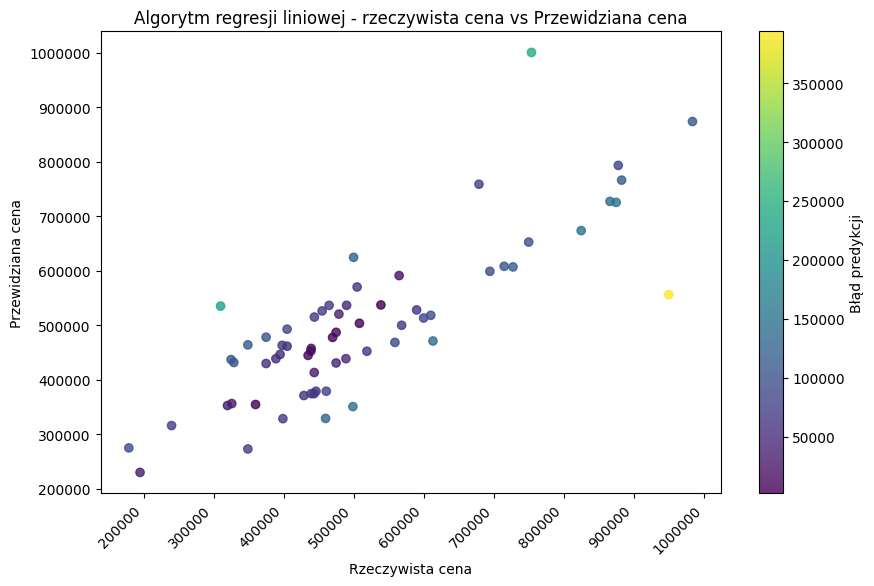

In [224]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, c=np.abs(predictions - y_test), cmap='viridis', alpha=0.8)
plt.colorbar(label='Błąd predykcji')
plt.xlabel("Rzeczywista cena")
plt.ylabel("Przewidziana cena")
plt.title("Algorytm regresji liniowej - rzeczywista cena vs Przewidziana cena")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=45, ha='right')
plt.show()

### 2. Algorytm drzew regresyjnych

#### Przygotowanie danych

In [225]:
data = df2[['Powierzchnia w m²', 'Umeblowane', 'Liczba pokoi', 'Dzielnica']]
target = df2['Kwota']
data['Dzielnica'] = data['Dzielnica'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

#### Tworzenie i trenowanie modelu

In [226]:
tree_model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [15,20, 25,],
    'min_samples_leaf': [15,10,20,25]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_tree_model = grid_search.best_estimator_
predictions = best_tree_model.predict(X_test)

#### Weryfikacja błedów prognoz 

In [227]:
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Najlepsze parametry:", best_params)
print("R^2:", r2)
print("MAE:", mae)
print("MAPE:", mape)

Najlepsze parametry: {'max_depth': 15, 'min_samples_leaf': 10}
R^2: 0.5694938072162667
MAE: 93513.97281097808
MAPE: 19.565327110858018


#### Wizualizacja algorytmu drzewa regresyjnego

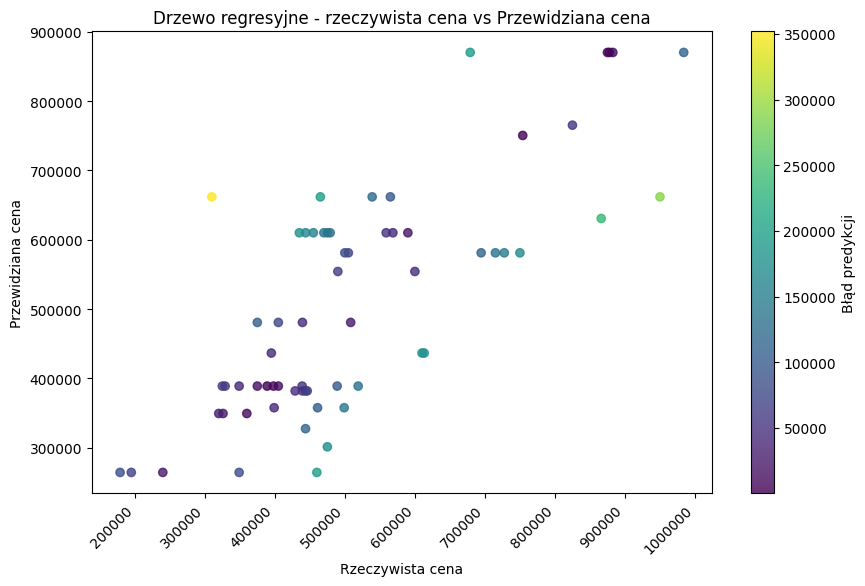

In [228]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, c=np.abs(predictions - y_test), cmap='viridis', alpha=0.8)
plt.colorbar(label='Błąd predykcji')
plt.xlabel("Rzeczywista cena")
plt.ylabel("Przewidziana cena")
plt.title("Drzewo regresyjne - rzeczywista cena vs Przewidziana cena")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Wyznaczenie prognoz cenowych

In [229]:
merged_df = pd.DataFrame({'Dzielnica_Original': df['Dzielnica'], 'Dzielnica_Data': data['Dzielnica']})
unique_results = merged_df.apply(lambda x: x.unique())
print(unique_results)

                 Dzielnica_Original  Dzielnica_Data
0                          Bogucice               0
1                         Giszowiec               4
2                            Murcki               9
3                          Koszutka               7
4                 Janów-Nikiszowiec               5
5                         Kostuchna               6
6                  Ligota-Panewniki               8
7               Osiedle Tysiąclecia              11
8                       Śródmieście              19
9                Piotrowice-Ochojec              13
10                   Osiedle Witosa              12
11                           Brynów               1
12  Osiedle Paderewskiego-Muchowiec              10
13              Szopienice-Burowiec              15
14             Wełnowiec-Józefowiec              16
15                           Załęże              18
16                              Dąb               2
17                         Zawodzie              17
18          

In [236]:
new_data = pd.DataFrame({
    'Powierzchnia w m²': [55, 70, 80, 90, 100],
    'Umeblowane': [1, 0, 1, 0, 1], 
    'Liczba pokoi': [2, 3, 2, 4, 3],
    'Dzielnica': [20,7,2,15,18],
})
new_data['Dzielnica']

0    20
1     7
2     2
3    15
4    18
Name: Dzielnica, dtype: int64

In [237]:
new_predictions = best_tree_model.predict(new_data)
print("\nPrzewidziane ceny dla nowych danych:")
new_predictions


Przewidziane ceny dla nowych danych:


array([610179.61111111, 661940.9375    , 581232.55      , 630746.8       ,
       750529.        ])

In [238]:
results = pd.DataFrame({
    'Powierzchnia w m²': new_data['Powierzchnia w m²'],
    'Umeblowane': new_data['Umeblowane'],
    'Liczba pokoi': new_data['Liczba pokoi'],
    'Dzielnica': new_data['Dzielnica'],
    'Przewidziana cena': new_predictions.astype(int)
    
})
print(results)

   Powierzchnia w m²  Umeblowane  Liczba pokoi  Dzielnica  Przewidziana cena
0                 55           1             2         20             610179
1                 70           0             3          7             661940
2                 80           1             2          2             581232
3                 90           0             4         15             630746
4                100           1             3         18             750529
